# Car Price Prediction using MLP Regression

This notebook implements a Multi-Layer Perceptron (MLP) regression model to predict car prices based on various features.

## 1. Import Libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Configure plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

## 2. Load and Explore Data

In [95]:
# Load the dataset
df = pd.read_csv('final_output.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset Shape: (3063, 11)

First few rows:


,car_age,year,owner,km_driven,brand_name_Mahindra,brand_name_Tata,brand_name_Toyota,brand_popularity,brand_name_Honda,brand_name_Chevrolet,selling_price
0,0.684211,0.315789,0,0.421683,0.0,0.0,0.0,1.000000,0.0,0.0,60000.000000
1,0.684211,0.315789,0,0.301201,0.0,0.0,0.0,1.000000,0.0,0.0,504355.832295
2,0.421053,0.578947,0,0.602407,0.0,0.0,0.0,0.578947,0.0,0.0,600000.000000
3,0.157895,0.842105,0,0.277104,0.0,0.0,0.0,0.026316,0.0,0.0,250000.000000
4,0.315789,0.684211,2,0.849397,0.0,0.0,0.0,0.188259,1.0,0.0,450000.000000


In [96]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Statistical summary
print("\nStatistical Summary:")
df.describe()

Missing values:
car_age                 0
year                    0
owner                   0
km_driven               0
brand_name_Mahindra     0
brand_name_Tata         0
brand_name_Toyota       0
brand_popularity        0
brand_name_Honda        0
brand_name_Chevrolet    0
selling_price           0
dtype: int64

Statistical Summary:


,car_age,year,owner,km_driven,brand_name_Mahindra,brand_name_Tata,brand_name_Toyota,brand_popularity,brand_name_Honda,brand_name_Chevrolet,selling_price
count,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3.063000e+03
mean,0.369533,0.630467,0.908586,0.395433,0.085211,0.093373,0.034280,0.521453,0.061051,0.046686,3.828599e+05
std,0.209673,0.209673,1.267645,0.216261,0.279240,0.291001,0.181977,0.365777,0.239463,0.211000,2.438987e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+04
25%,0.210526,0.473684,0.000000,0.234935,0.000000,0.000000,0.000000,0.192308,0.000000,0.000000,1.950000e+05
50%,0.368421,0.631579,0.000000,0.364550,0.000000,0.000000,0.000000,0.578947,0.000000,0.000000,3.250000e+05
75%,0.526316,0.789474,2.000000,0.542166,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.300000e+05
max,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000e+06


In [97]:
# Check data types
print("Data types:")
print(df.dtypes)

# Check for any outliers in target variable
print("\nTarget variable (selling_price) statistics:")
print(df['selling_price'].describe())

Data types:
car_age                 float64
year                    float64
owner                     int64
km_driven               float64
brand_name_Mahindra     float64
brand_name_Tata         float64
brand_name_Toyota       float64
brand_popularity        float64
brand_name_Honda        float64
brand_name_Chevrolet    float64
selling_price           float64
dtype: object

Target variable (selling_price) statistics:
count    3.063000e+03
mean     3.828599e+05
std      2.438987e+05
min      2.000000e+04
25%      1.950000e+05
50%      3.250000e+05
75%      5.300000e+05
max      1.200000e+06
Name: selling_price, dtype: float64


## 3. Data Visualization

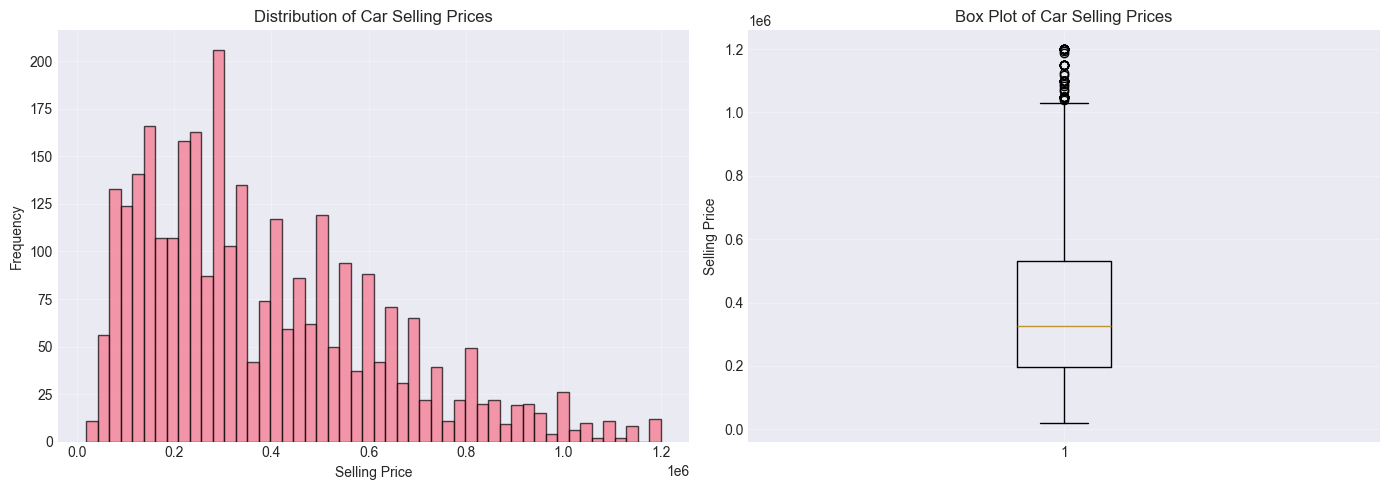

In [98]:
# Distribution of target variable
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['selling_price'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Selling Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Car Selling Prices')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df['selling_price'])
axes[1].set_ylabel('Selling Price')
axes[1].set_title('Box Plot of Car Selling Prices')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

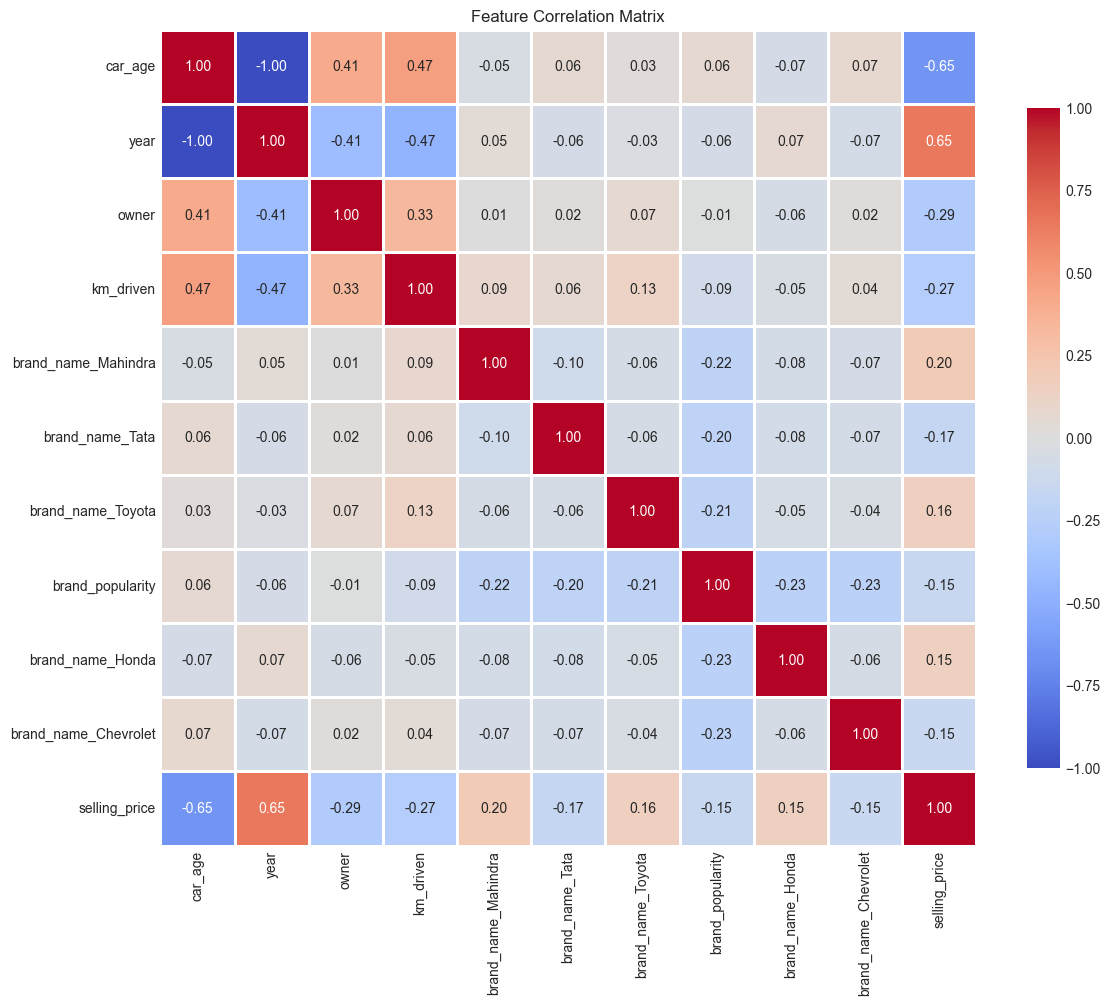


Correlation with selling_price:
selling_price           1.000000
year                    0.654623
brand_name_Mahindra     0.198022
brand_name_Toyota       0.158757
brand_name_Honda        0.149692
brand_name_Chevrolet   -0.146646
brand_popularity       -0.153246
brand_name_Tata        -0.167714
km_driven              -0.270688
owner                  -0.294845
car_age                -0.654623
Name: selling_price, dtype: float64


In [99]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Show correlation with target variable
print("\nCorrelation with selling_price:")
print(correlation_matrix['selling_price'].sort_values(ascending=False))

## 4. Prepare Data for Training

In [100]:
# Separate features and target
X = df.drop('selling_price', axis=1)
y = df['selling_price']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature columns:")
print(X.columns.tolist())

Features shape: (3063, 10)
Target shape: (3063,)

Feature columns:
['car_age', 'year', 'owner', 'km_driven', 'brand_name_Mahindra', 'brand_name_Tata', 'brand_name_Toyota', 'brand_popularity', 'brand_name_Honda', 'brand_name_Chevrolet']


In [101]:
# Split data into train, validation, and test sets
# 70% train, 15% validation, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42)  # 0.1765 ≈ 15/85

print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 2143
Validation set size: 460
Test set size: 460


In [102]:
# Scale the target variable for better training
# Since features are already normalized, we only need to scale the target
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_val_scaled = target_scaler.transform(y_val.values.reshape(-1, 1)).flatten()
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

print("Target variable scaled successfully")

Target variable scaled successfully


## 5. Build MLP Model

In [103]:
def create_mlp_model(input_dim, learning_rate=0.005):
    """
    Create a Multi-Layer Perceptron model for regression
    
    Args:
        input_dim: Number of input features
        learning_rate: Learning rate for the optimizer
    
    Returns:
        Compiled Keras model
    """
    model = keras.Sequential([
        # Input layer
        layers.Input(shape=(input_dim,)),
        
        # First hidden layer
        layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        # Second hidden layer
        layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        # Third hidden layer
        layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        # Fourth hidden layer
        layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
        layers.Dropout(0.2),
        
        # Output layer (no activation for regression)
        layers.Dense(1)
    ])
    
    # Compile model
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mae', 'mse']
    )
    
    return model

# Create the model
model = create_mlp_model(input_dim=X_train.shape[1])

# Display model architecture
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 256)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,873 (187.00 KB)

 Trainable params: 46,977 (183.50 KB)

 Non-trainable params: 896 (3.50 KB)

## 6. Train the Model

In [104]:
# Define callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=50,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=20,
    min_lr=1e-7,
    verbose=1
)

# Train the model
history = model.fit(
    X_train, y_train_scaled,
    validation_data=(X_val, y_val_scaled),
    epochs=500,
    batch_size=128,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 2.7124 - mae: 1.2242 - mse: 2.7124 - val_loss: 0.8556 - val_mae: 0.7644 - val_mse: 0.8556 - learning_rate: 0.0050
Epoch 2/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2401 - mae: 0.8367 - mse: 1.2401 - val_loss: 1.0511 - val_mae: 0.8632 - val_mse: 1.0511 - learning_rate: 0.0050
Epoch 3/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8971 - mae: 0.7217 - mse: 0.8971 - val_loss: 0.7984 - val_mae: 0.7205 - val_mse: 0.7984 - learning_rate: 0.0050
Epoch 4/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7536 - mae: 0.6669 - mse: 0.7536 - val_loss: 0.7621 - val_mae: 0.7092 - val_mse: 0.7621 - learning_rate: 0.0050
Epoch 5/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6800 - mae: 0.6401 - mse: 0.6800 - val_loss: 0.7383 - val_mae: 0.6809 - val_mse: 0.7383 - learning_rate: 0.0050
Epoch 6/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6566 - mae: 0.6252 - mse: 0.6566 - val_loss: 0.7298 - val_mae: 0.6905 - v

## 7. Visualize Training History

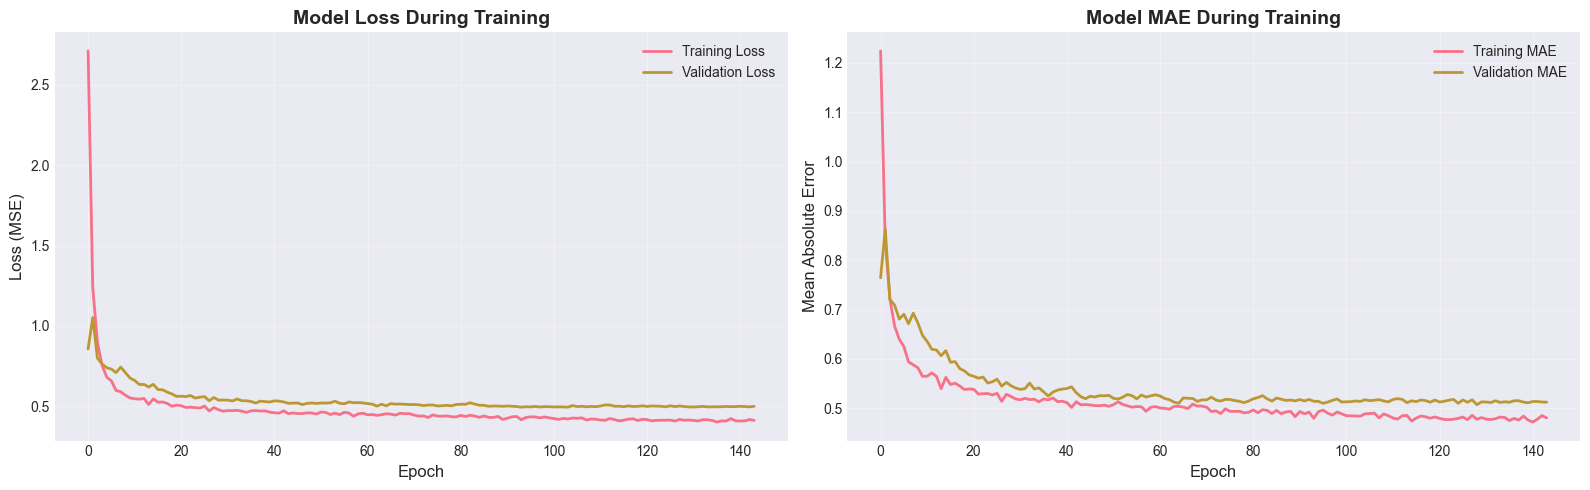

In [105]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Loss plot
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss (MSE)', fontsize=12)
axes[0].set_title('Model Loss During Training', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# MAE plot
axes[1].plot(history.history['mae'], label='Training MAE', linewidth=2)
axes[1].plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Mean Absolute Error', fontsize=12)
axes[1].set_title('Model MAE During Training', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Evaluate Model Performance

In [106]:
# Make predictions
y_train_pred_scaled = model.predict(X_train)
y_val_pred_scaled = model.predict(X_val)
y_test_pred_scaled = model.predict(X_test)

# Inverse transform predictions to original scale
y_train_pred = target_scaler.inverse_transform(y_train_pred_scaled).flatten()
y_val_pred = target_scaler.inverse_transform(y_val_pred_scaled).flatten()
y_test_pred = target_scaler.inverse_transform(y_test_pred_scaled).flatten()

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [107]:
# Calculate metrics for all sets
def calculate_metrics(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    print(f"\n{'='*50}")
    print(f"{set_name} Set Metrics:")
    print(f"{'='*50}")
    print(f"Mean Squared Error (MSE):     {mse:,.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
    print(f"Mean Absolute Error (MAE):    {mae:,.2f}")
    print(f"R² Score:                     {r2:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2, 'MAPE': mape}

# Calculate and display metrics
train_metrics = calculate_metrics(y_train, y_train_pred, "Training")
val_metrics = calculate_metrics(y_val, y_val_pred, "Validation")
test_metrics = calculate_metrics(y_test, y_test_pred, "Test")


Training Set Metrics:
Mean Squared Error (MSE):     22,466,496,425.63
Root Mean Squared Error (RMSE): 149,888.28
Mean Absolute Error (MAE):    110,616.14
R² Score:                     0.6132
Mean Absolute Percentage Error (MAPE): 38.12%

Validation Set Metrics:
Mean Squared Error (MSE):     28,614,267,622.22
Root Mean Squared Error (RMSE): 169,157.52
Mean Absolute Error (MAE):    123,947.05
R² Score:                     0.5731
Mean Absolute Percentage Error (MAPE): 42.69%

Test Set Metrics:
Mean Squared Error (MSE):     28,798,917,567.77
Root Mean Squared Error (RMSE): 169,702.44
Mean Absolute Error (MAE):    126,961.85
R² Score:                     0.5053
Mean Absolute Percentage Error (MAPE): 41.72%


In [108]:
# Create metrics comparison dataframe
metrics_df = pd.DataFrame({
    'Training': train_metrics,
    'Validation': val_metrics,
    'Test': test_metrics
})

print("\nMetrics Comparison:")
print(metrics_df)


Metrics Comparison:
          Training    Validation          Test
MSE   2.246650e+10  2.861427e+10  2.879892e+10
RMSE  1.498883e+05  1.691575e+05  1.697024e+05
MAE   1.106161e+05  1.239471e+05  1.269619e+05
R2    6.131911e-01  5.730784e-01  5.053476e-01
MAPE  3.812447e+01  4.269310e+01  4.171887e+01


## 9. Visualize Predictions

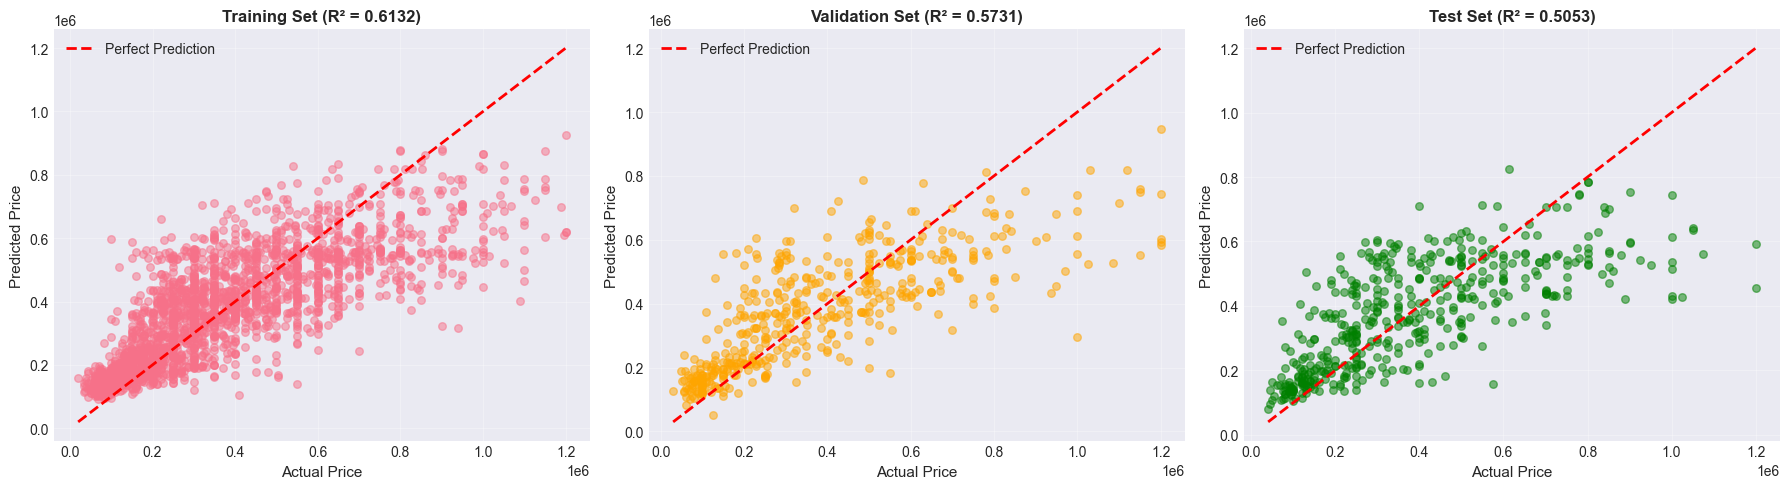

In [109]:
# Predicted vs Actual plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.5, s=30)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Price', fontsize=11)
axes[0].set_ylabel('Predicted Price', fontsize=11)
axes[0].set_title(f'Training Set (R² = {train_metrics["R2"]:.4f})', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Validation set
axes[1].scatter(y_val, y_val_pred, alpha=0.5, s=30, color='orange')
axes[1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Price', fontsize=11)
axes[1].set_ylabel('Predicted Price', fontsize=11)
axes[1].set_title(f'Validation Set (R² = {val_metrics["R2"]:.4f})', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Test set
axes[2].scatter(y_test, y_test_pred, alpha=0.5, s=30, color='green')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[2].set_xlabel('Actual Price', fontsize=11)
axes[2].set_ylabel('Predicted Price', fontsize=11)
axes[2].set_title(f'Test Set (R² = {test_metrics["R2"]:.4f})', fontsize=12, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

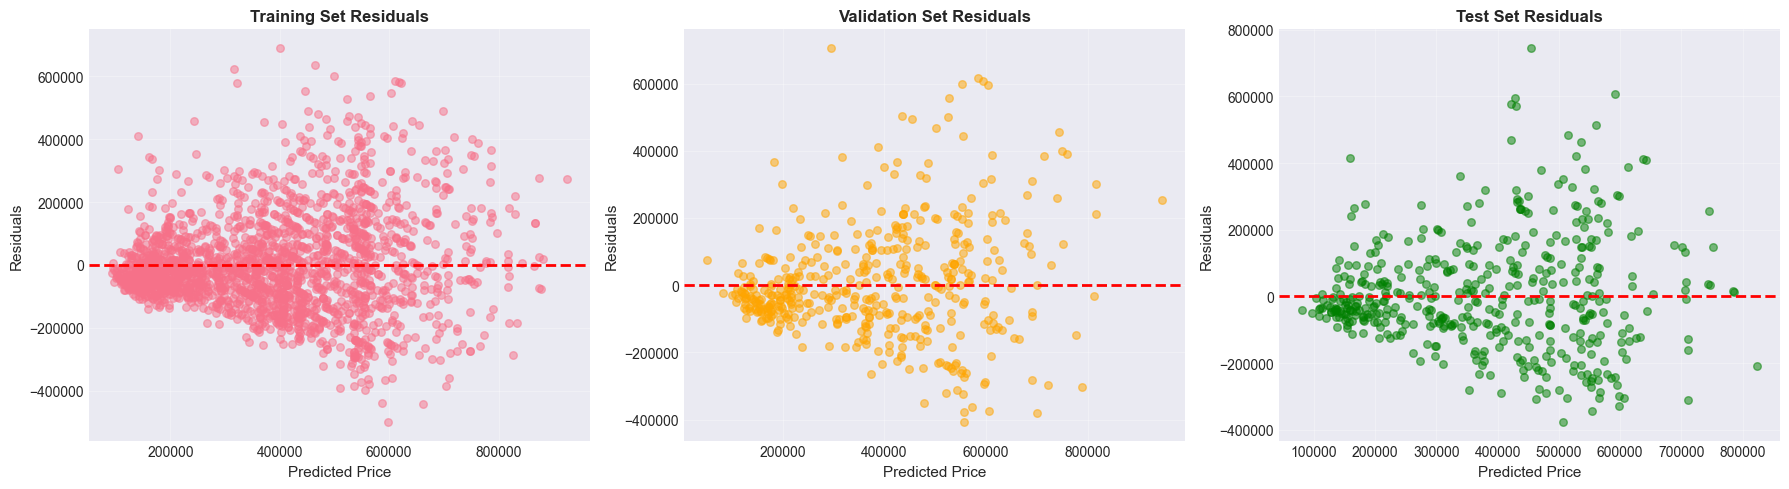

In [110]:
# Residual plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Training set residuals
train_residuals = y_train - y_train_pred
axes[0].scatter(y_train_pred, train_residuals, alpha=0.5, s=30)
axes[0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0].set_xlabel('Predicted Price', fontsize=11)
axes[0].set_ylabel('Residuals', fontsize=11)
axes[0].set_title('Training Set Residuals', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Validation set residuals
val_residuals = y_val - y_val_pred
axes[1].scatter(y_val_pred, val_residuals, alpha=0.5, s=30, color='orange')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Price', fontsize=11)
axes[1].set_ylabel('Residuals', fontsize=11)
axes[1].set_title('Validation Set Residuals', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Test set residuals
test_residuals = y_test - y_test_pred
axes[2].scatter(y_test_pred, test_residuals, alpha=0.5, s=30, color='green')
axes[2].axhline(y=0, color='r', linestyle='--', lw=2)
axes[2].set_xlabel('Predicted Price', fontsize=11)
axes[2].set_ylabel('Residuals', fontsize=11)
axes[2].set_title('Test Set Residuals', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

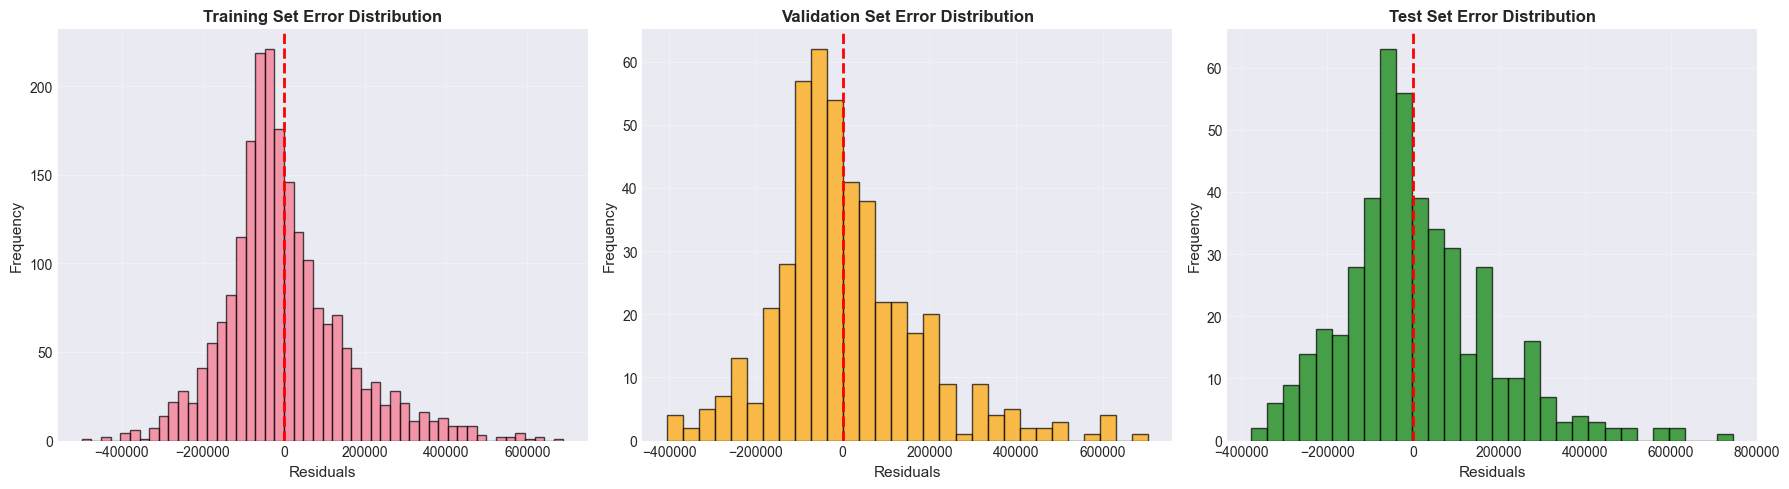

In [111]:
# Error distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Training set
axes[0].hist(train_residuals, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Residuals', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Training Set Error Distribution', fontsize=12, fontweight='bold')
axes[0].axvline(x=0, color='r', linestyle='--', lw=2)
axes[0].grid(True, alpha=0.3)

# Validation set
axes[1].hist(val_residuals, bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Residuals', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Validation Set Error Distribution', fontsize=12, fontweight='bold')
axes[1].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1].grid(True, alpha=0.3)

# Test set
axes[2].hist(test_residuals, bins=30, edgecolor='black', alpha=0.7, color='green')
axes[2].set_xlabel('Residuals', fontsize=11)
axes[2].set_ylabel('Frequency', fontsize=11)
axes[2].set_title('Test Set Error Distribution', fontsize=12, fontweight='bold')
axes[2].axvline(x=0, color='r', linestyle='--', lw=2)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Analyze Predictions

In [112]:
# Create a comparison dataframe for test set
test_comparison = pd.DataFrame({
    'Actual_Price': y_test.values,
    'Predicted_Price': y_test_pred,
    'Absolute_Error': np.abs(y_test.values - y_test_pred),
    'Percentage_Error': np.abs((y_test.values - y_test_pred) / y_test.values) * 100
})

print("Sample Predictions from Test Set:")
print(test_comparison.head(20))

Sample Predictions from Test Set:
    Actual_Price  Predicted_Price  Absolute_Error  Percentage_Error
0       215000.0    377521.281250   162521.281250         75.591294
1       880000.0    557226.500000   322773.500000         36.678807
2       300000.0    384178.375000    84178.375000         28.059458
3       380000.0    406485.593750    26485.593750          6.969893
4       200000.0    362624.406250   162624.406250         81.312203
5       250000.0    472493.156250   222493.156250         88.997262
6       229999.0    303128.843750    73129.843750         31.795722
7       375000.0    356818.718750    18181.281250          4.848342
8       140000.0    168117.062500    28117.062500         20.083616
9       250000.0    340383.500000    90383.500000         36.153400
10      730000.0    561199.000000   168801.000000         23.123425
11      212000.0    149907.312500    62092.687500         29.289004
12      575000.0    440475.218750   134524.781250         23.395614
13      110000

In [113]:
# Find best and worst predictions
print("\nBest 10 Predictions (Lowest Absolute Error):")
print(test_comparison.nsmallest(10, 'Absolute_Error'))

print("\nWorst 10 Predictions (Highest Absolute Error):")
print(test_comparison.nlargest(10, 'Absolute_Error'))


Best 10 Predictions (Lowest Absolute Error):
     Actual_Price  Predicted_Price  Absolute_Error  Percentage_Error
29       190000.0    190513.421875      513.421875          0.270222
85       130000.0    130531.742188      531.742188          0.409032
391      175000.0    174075.625000      924.375000          0.528214
297      555000.0    553730.062500     1269.937500          0.228818
59       300000.0    298021.937500     1978.062500          0.659354
102      220000.0    217666.703125     2333.296875          1.060589
119      160000.0    162699.312500     2699.312500          1.687070
178      100000.0    103530.320312     3530.320312          3.530320
172      415000.0    411069.718750     3930.281250          0.947056
213      550000.0    545278.875000     4721.125000          0.858386

Worst 10 Predictions (Highest Absolute Error):
     Actual_Price  Predicted_Price  Absolute_Error  Percentage_Error
436     1200000.0     455303.25000    744696.75000         62.058062
264     1

## 11. Save the Model

In [114]:
# Save the trained model
model.save('car_price_mlp_model.h5')
print("Model saved as 'car_price_mlp_model.h5'")

# Save the target scaler
import joblib
joblib.dump(target_scaler, 'target_scaler.pkl')
print("Target scaler saved as 'target_scaler.pkl'")

Model saved as 'car_price_mlp_model.h5'
Target scaler saved as 'target_scaler.pkl'


## 12. Make Predictions on New Data (Example)

In [115]:
# Example: Make prediction on a single sample
sample_index = 0
sample_input = X_test.iloc[sample_index:sample_index+1]

print("Sample Input Features:")
print(sample_input)

# Make prediction
sample_pred_scaled = model.predict(sample_input)
sample_pred = target_scaler.inverse_transform(sample_pred_scaled).flatten()[0]

print(f"\nActual Price: ${y_test.iloc[sample_index]:,.2f}")
print(f"Predicted Price: ${sample_pred:,.2f}")
print(f"Absolute Error: ${np.abs(y_test.iloc[sample_index] - sample_pred):,.2f}")

Sample Input Features:
       car_age      year  owner  km_driven  brand_name_Mahindra  \
1241  0.421053  0.578947      0   0.584335                  0.0   

      brand_name_Tata  brand_name_Toyota  brand_popularity  brand_name_Honda  \
1241              0.0                0.0          0.074899               0.0   

      brand_name_Chevrolet  
1241                   0.0  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

Actual Price: $215,000.00
Predicted Price: $377,521.28
Absolute Error: $162,521.28


## 13. Model Summary and Conclusions

In [116]:
print("\n" + "="*70)
print("MODEL PERFORMANCE SUMMARY")
print("="*70)
print(f"\nModel Architecture:")
print(f"  - Input Features: {X_train.shape[1]}")
print(f"  - Hidden Layers: 4 (128→64→32→16 neurons)")
print(f"  - Activation: ReLU")
print(f"  - Dropout: Yes (0.2-0.3)")
print(f"  - Batch Normalization: Yes")
print(f"\nTraining Configuration:")
print(f"  - Optimizer: Adam")
print(f"  - Loss Function: MSE")
print(f"  - Batch Size: 32")
print(f"  - Total Epochs Trained: {len(history.history['loss'])}")
print(f"\nDataset Split:")
print(f"  - Training: {X_train.shape[0]} samples")
print(f"  - Validation: {X_val.shape[0]} samples")
print(f"  - Test: {X_test.shape[0]} samples")
print(f"\nFinal Test Set Performance:")
print(f"  - R² Score: {test_metrics['R2']:.4f}")
print(f"  - RMSE: ${test_metrics['RMSE']:,.2f}")
print(f"  - MAE: ${test_metrics['MAE']:,.2f}")
print(f"  - MAPE: {test_metrics['MAPE']:.2f}%")
print("\n" + "="*70)


MODEL PERFORMANCE SUMMARY

Model Architecture:
  - Input Features: 10
  - Hidden Layers: 4 (128→64→32→16 neurons)
  - Activation: ReLU
  - Dropout: Yes (0.2-0.3)
  - Batch Normalization: Yes

Training Configuration:
  - Optimizer: Adam
  - Loss Function: MSE
  - Batch Size: 32
  - Total Epochs Trained: 144

Dataset Split:
  - Training: 2143 samples
  - Validation: 460 samples
  - Test: 460 samples

Final Test Set Performance:
  - R² Score: 0.5053
  - RMSE: $169,702.44
  - MAE: $126,961.85
  - MAPE: 41.72%

